For this homework you need to choose a dataset from the list below and test various classification
methods with the ultimate goal of developing a model that classifies as accurately as possible. To
complete this task, you must follow these steps:

### 1) Exploratory Data Analysis (EDA) – 2p

a. Describe the structure of the data: number of rows, columns, and data types.

b. Identify correlations between data

c. Make plots to show data distributions

d. Identify target and feature variables

e. Highlight Potential Issues in the Data

In [53]:
# a. Describe the structure of the data: number of rows, columns, and data types.

import pandas as pd

file_path = "Student_performance.csv"
data = pd.read_csv(file_path)
orig_data = data.copy()

data_info = data.info() # 2392 rows, 14 columns, int and floats
data_head = data.head()


data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


(None,
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
 0       1001   17       1          0                  2        19.833723   
 1       1002   18       0          0                  1        15.408756   
 2       1003   15       0          2                  3         4.210570   
 3       1004   17       1          0                  3        10.028829   
 4       1005   17       1          0                  2         4.672495   
 
    Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
 0         7         1                2                0       0      1   
 1         0         0                1                0       0      0   
 2        26         0                2                0       0      0   
 3        14         0                3                1       0      0   
 4        17         1                3                0       0      0   
 
    Volunteering       GPA  GradeClass  
 0             0  2.929196          

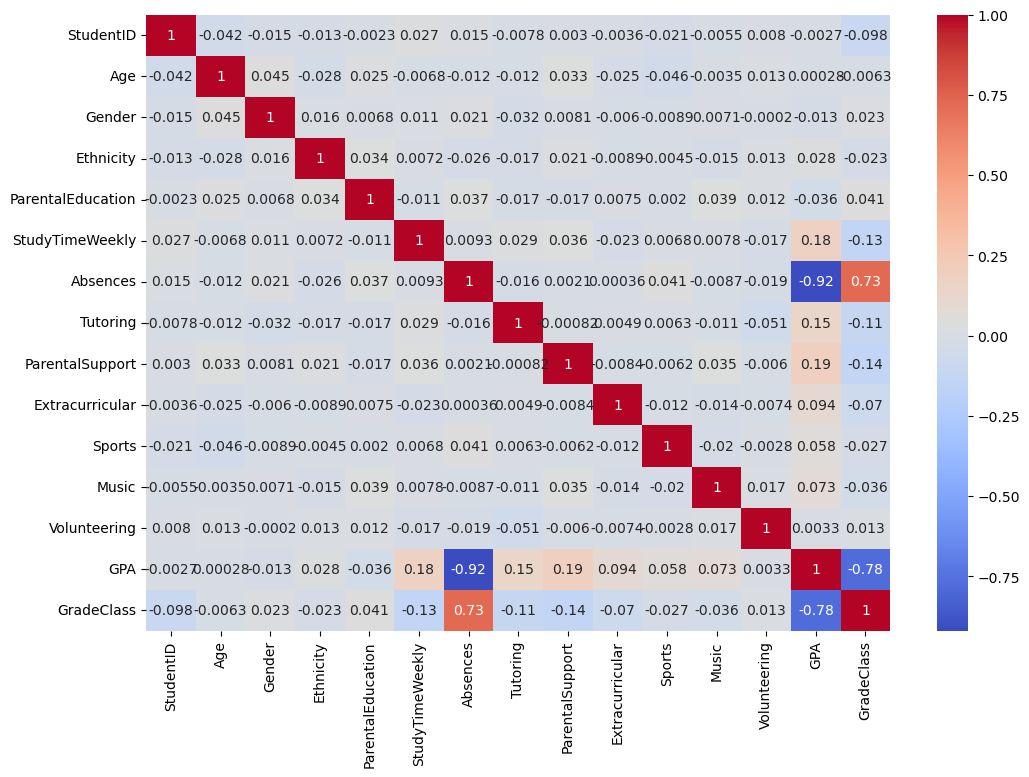

In [54]:
# b. Identify correlations between data

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# correlation between the number of absences and the GradeClass
# correlation between the number of absences and the GPA
# correlation between the GradeClass and the GPA, in fact i think they're based on each other somehow? 

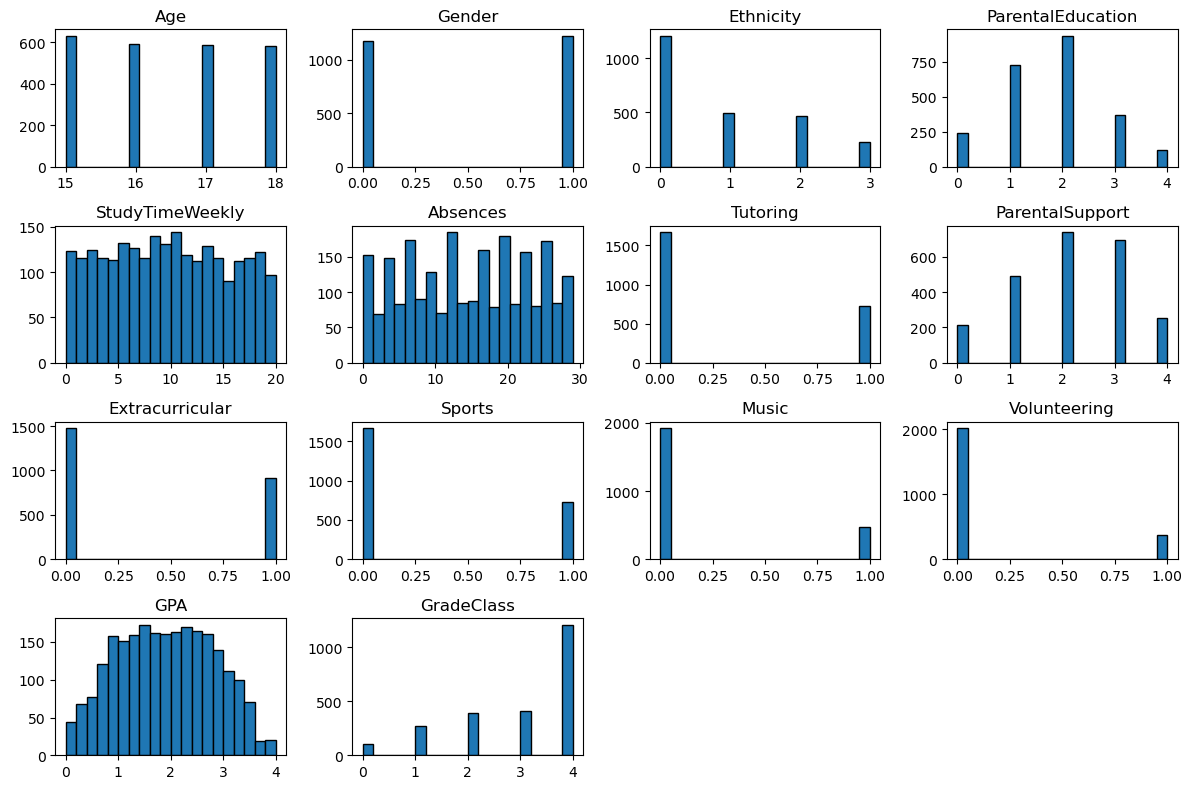

In [55]:
# c. Make plots to show data distributions

data_no_id = data.drop('StudentID', axis=1) # no student id, it's useless tbh, for this at least
data_no_id.hist(grid=False, bins=20, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()


In [56]:
# d. Identify target and feature variables
# GPA is the target... probably
# feature columns are anything but GradeClass and StudentID, I think. StudentID is meaningless in this dataset
# and gradeclass is based on GPA, as in if GPA is between 0 and 2, gradeclass is 4 and so on.

# Every column is a feature except for GPA, GradeClass and StudentID
features = data.drop(columns=['GPA', 'GradeClass', 'StudentID'])
target = data['GPA']

print(features.head())
print(target.head())

data.drop(columns=['StudentID'], inplace=True) # useless
data.drop(columns=['GradeClass'], inplace=True) # useless

   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2        19.833723         7   
1   18       0          0                  1        15.408756         0   
2   15       0          2                  3         4.210570        26   
3   17       1          0                  3        10.028829        14   
4   17       1          0                  2         4.672495        17   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  
0         1                2                0       0      1             0  
1         0                1                0       0      0             0  
2         0                2                0       0      0             0  
3         0                3                1       0      0             0  
4         1                3                0       0      0             0  
0    2.929196
1    3.042915
2    0.112602
3    2.054218
4    1.288061
Name: GPA, dtype:

### e. Highlight Potential Issues in the Data

Data is skewed towards ethnicity 0 and 
Besides that it's relatively good.
Ah, there's also some useless columns like StudentID and GradeClass

### 2) Data preprocessing – 2 p
a. Identify outliers

b. Deal with missing values

c. Deal with categorical data

d. Standardize or normalize numerical features as needed

e. Use principal component analysis (PCA)

In [57]:
# a. Identify outliers
# IQR seemed easiest https://ca.indeed.com/career-advice/career-development/outliers-in-statistics

import pandas as pd

def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

numerical_columns = ['StudyTimeWeekly', 'Absences', 'GPA', ]
outliers = identify_outliers(orig_data, numerical_columns)

for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:")
    if outlier_df.empty:
        print("None")
    else:
        print(outlier_df)
    print("\n")


Outliers in StudyTimeWeekly:
None


Outliers in Absences:
None


Outliers in GPA:
None




In [58]:
# b. Deal with missing values

# Check for missing values
missing_data = data.isnull().sum()
if missing_data.sum() == 0:
    print("No missing data. Yayyy!")
else:
    print("Missing Data:\n" + missing_data.to_string())


No missing data. Yayyy!


In [59]:
# c. Deal with categorical data

print("All categorical data is already encoded into ints. Ha, ez")

All categorical data is already encoded into ints. Ha, ez


In [60]:
# d. Standardize or normalize numerical features as needed
# PCA seems to want standardized data, soooo I'll do that, 
# used: https://www.datacamp.com/tutorial/normalization-vs-standardization

from sklearn.preprocessing import StandardScaler

numerical_columns = ['StudyTimeWeekly', 'Absences', 'GPA']

scaler = StandardScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Data after standardization:")
print(data.head())


Data after standardization:
   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   17       1          0                  2         1.780336 -0.890822   
1   18       0          0                  1         0.997376 -1.717694   
2   15       0          2                  3        -0.984045  1.353542   
3   17       1          0                  3         0.045445 -0.063951   
4   17       1          0                  2        -0.902311  0.290422   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         1                2                0       0      1             0   
1         0                1                0       0      0             0   
2         0                2                0       0      0             0   
3         0                3                1       0      0             0   
4         1                3                0       0      0             0   

        GPA  
0  1.118086  
1  1.242374  
2 -1.96027

Explained variance ratio by each component:
[0.64497346 0.3345012 ]

PCA Components DataFrame:
       PCA1      PCA2
0  1.639388  1.587203
1  2.200896  0.661662
2 -2.454312 -0.724887
3  0.164780  0.033858
4 -0.796069 -0.836255


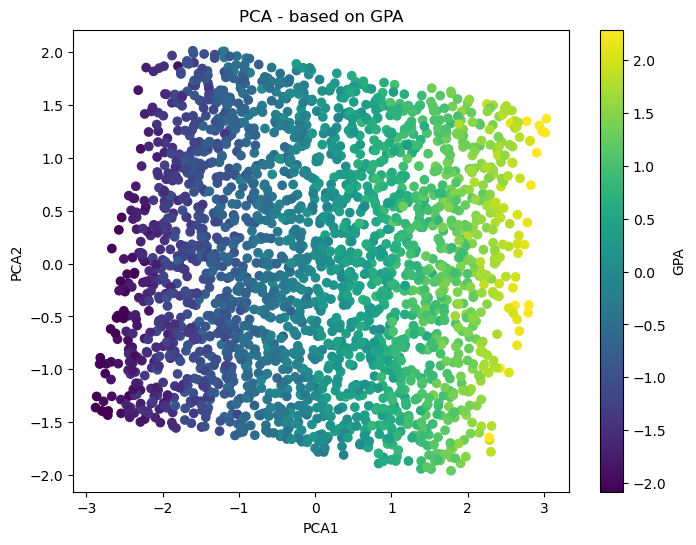

In [61]:
# e. Use principal component analysis (PCA)

from sklearn.decomposition import PCA

# apparently categorical data is bad for PCA
# used: https://stackoverflow.com/questions/40795141/pca-for-categorical-features
numerical_columns = ['StudyTimeWeekly', 'Absences', 'GPA']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[numerical_columns])
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# how much is explained by each component
# used: https://saturncloud.io/blog/what-is-sklearn-pca-explained-variance-and-explained-variance-ratio-difference/
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)

print("\nPCA Components DataFrame:")
print(pca_df.head())

# I'm not quite sure it looks right, but I'm too tired (exhausting week... month)
# used: https://builtin.com/machine-learning/pca-in-python
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=data['GPA'], cmap='viridis')
plt.colorbar(label='GPA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - based on GPA')
plt.show()


### 3) Propose and test 2 different methods that deal with data imbalance (e.g. SMOTE, ADASYN, undersampling, etc.) – 1 p

They (SMOTE and ADASYN) only work on categorical data so I'll use GradeClass i guess?

In [62]:
# SMOTE

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split

# drop gpa grade and student cause they're not usable for smote
X = orig_data.drop(columns=['GPA', 'GradeClass', 'StudentID']) 
y = orig_data['GradeClass'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=17)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution before SMOTE:
GradeClass
4    974
3    328
2    306
1    220
0     85
Name: count, dtype: int64

Class distribution after SMOTE:
GradeClass
4    974
1    974
2    974
3    974
0    974
Name: count, dtype: int64


In [63]:
# ADASYN

# drop gpa grade and student cause they're not usable for adasyn
X = orig_data.drop(columns=['GPA', 'GradeClass', 'StudentID'])
y = orig_data['GradeClass'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN(random_state=17, n_neighbors=7)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print("Class distribution before ADASYN:")
print(y_train.value_counts())

print("\nClass distribution after ADASYN:")
print(pd.Series(y_train_adasyn).value_counts())


Class distribution before ADASYN:
GradeClass
4    974
3    328
2    306
1    220
0     85
Name: count, dtype: int64

Class distribution after ADASYN:
GradeClass
2    1006
4     974
1     968
0     959
3     926
Name: count, dtype: int64


### 4) Test out 5 different ML methods and print out all performance metrics (Recall, Precision, Accuracy, F1). Test the performance of Voting Classifier which combines predictions from multiple models – 4p

In [64]:
# Linear Regression SMOTE
# used: https://realpython.com/linear-regression-in-python/
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

linear_reg = LinearRegression()

linear_reg.fit(X_train_smote, y_train_smote)

y_pred_linear_reg = linear_reg.predict(X_test)

y_pred_linear_reg = y_pred_linear_reg.round()

accuracy_lr = accuracy_score(y_test, y_pred_linear_reg)
precision_lr = precision_score(y_test, y_pred_linear_reg, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_linear_reg, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_linear_reg, average='weighted', zero_division=0)

print(f"Linear Regression: Accuracy={accuracy_lr:.4f}, Precision={precision_lr:.4f}, Recall={recall_lr:.4f}, F1={f1_lr:.4f}")


Linear Regression: Accuracy=0.4405, Precision=0.6131, Recall=0.4405, F1=0.4655


In [65]:
# Random Forest Regressor SMOTE
# used: https://www.geeksforgeeks.org/random-forest-regression-in-python/
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)

y_pred_rf = y_pred_rf.round()

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Random Forest Regressor: Accuracy={accuracy_rf:.4f}, Precision={precision_rf:.4f}, Recall={recall_rf:.4f}, F1={f1_rf:.4f}")



Random Forest Regressor: Accuracy=0.5637, Precision=0.6580, Recall=0.5637, F1=0.5839


In [66]:
# Support Vector Regressor 
# used: https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(X_train_smote, y_train_smote)

y_pred_svr = svr_model.predict(X_test)

y_pred_svr = y_pred_svr.round()

accuracy_svr = accuracy_score(y_test, y_pred_svr)
precision_svr = precision_score(y_test, y_pred_svr, average='weighted', zero_division=0)
recall_svr = recall_score(y_test, y_pred_svr, average='weighted', zero_division=0)
f1_svr = f1_score(y_test, y_pred_svr, average='weighted', zero_division=0)

print(f"SVR: Accuracy={accuracy_svr:.4f}, Precision={precision_svr:.4f}, Recall={recall_svr:.4f}, F1={f1_svr:.4f}")



SVR: Accuracy=0.6889, Precision=0.7174, Recall=0.6889, F1=0.6978


In [67]:
# K-Nearest Neighbors Regressor SMOTE
# used: 
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

knn_model.fit(X_train_smote, y_train_smote)

y_pred_knn = knn_model.predict(X_test)

y_pred_knn = y_pred_knn.round()

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

print(f"KNN Regressor: Accuracy={accuracy_knn:.4f}, Precision={precision_knn:.4f}, Recall={recall_knn:.4f}, F1={f1_knn:.4f}")



KNN Regressor: Accuracy=0.4593, Precision=0.5866, Recall=0.4593, F1=0.4815


In [68]:
# Gradient Boosting Regressor SMOTE
# used: https://www.geeksforgeeks.org/ml-gradient-boosting/
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train_smote, y_train_smote)

y_pred_gbr = gbr_model.predict(X_test)

y_pred_gbr = y_pred_gbr.round()

accuracy_gbr = accuracy_score(y_test, y_pred_gbr)
precision_gbr = precision_score(y_test, y_pred_gbr, average='weighted', zero_division=0)
recall_gbr = recall_score(y_test, y_pred_gbr, average='weighted', zero_division=0)
f1_gbr = f1_score(y_test, y_pred_gbr, average='weighted', zero_division=0)

print(f"Gradient Boosting Regressor: Accuracy={accuracy_gbr:.4f}, Precision={precision_gbr:.4f}, Recall={recall_gbr:.4f}, F1={f1_gbr:.4f}")



Gradient Boosting Regressor: Accuracy=0.4760, Precision=0.6483, Recall=0.4760, F1=0.5016


In [69]:
# Voting Regressor SMOTE
# used: https://medium.com/data-and-beyond/voting-regressor-intuition-and-implementation-0359771b5204
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor()),
    ('svr', SVR())
])

voting_model.fit(X_train_smote, y_train_smote)

y_pred_voting = voting_model.predict(X_test)

y_pred_voting = y_pred_voting.round()

accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted', zero_division=0)
recall_voting = recall_score(y_test, y_pred_voting, average='weighted', zero_division=0)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted', zero_division=0)

print(f"Voting Regressor: Accuracy={accuracy_voting:.4f}, Precision={precision_voting:.4f}, Recall={recall_voting:.4f}, F1={f1_voting:.4f}")



Voting Regressor: Accuracy=0.5637, Precision=0.6649, Recall=0.5637, F1=0.5852


In [70]:
# Comparing Model Performance SMOTE
model_performance = {
    'Linear Regression': {'Accuracy': accuracy_lr, 'Precision': precision_lr, 'Recall': recall_lr, 'F1': f1_lr},
    'Random Forest Regressor': {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1': f1_rf},
    'SVR': {'Accuracy': accuracy_svr, 'Precision': precision_svr, 'Recall': recall_svr, 'F1': f1_svr},
    'KNN Regressor': {'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1': f1_knn},
    'Gradient Boosting Regressor': {'Accuracy': accuracy_gbr, 'Precision': precision_gbr, 'Recall': recall_gbr, 'F1': f1_gbr},
    'Voting Regressor': {'Accuracy': accuracy_voting, 'Precision': precision_voting, 'Recall': recall_voting, 'F1': f1_voting},
}

sorted_model_performance = dict(sorted(model_performance.items(), key=lambda item: item[1]['Accuracy'], reverse=True))

print("Model Performance Comparison (Ranked by Accuracy):")
for model_name, metrics in sorted_model_performance.items():
    print(f"{model_name}: Accuracy={metrics['Accuracy']:.4f}, Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1={metrics['F1']:.4f}")


Model Performance Comparison (Ranked by Accuracy):
SVR: Accuracy=0.6889, Precision=0.7174, Recall=0.6889, F1=0.6978
Random Forest Regressor: Accuracy=0.5637, Precision=0.6580, Recall=0.5637, F1=0.5839
Voting Regressor: Accuracy=0.5637, Precision=0.6649, Recall=0.5637, F1=0.5852
Gradient Boosting Regressor: Accuracy=0.4760, Precision=0.6483, Recall=0.4760, F1=0.5016
KNN Regressor: Accuracy=0.4593, Precision=0.5866, Recall=0.4593, F1=0.4815
Linear Regression: Accuracy=0.4405, Precision=0.6131, Recall=0.4405, F1=0.4655


### 6) Use k-fold cross validation to prove robustness - 1p

In [71]:
# k-fold Cross-Validation SMOTE
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Linear Regression': linear_reg,
    'Random Forest Regressor': rf_model,
    'SVR': svr_model,
    'KNN Regressor': knn_model,
    'Gradient Boosting Regressor': gbr_model,
    'Voting Regressor': voting_model
}

cv_results = {}

k = 7 # 7 cause July (my birth month) :D

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=k, scoring='r2')
    
    cv_results[model_name] = {
        'Mean R²': np.mean(scores),
        'Standard Deviation R²': np.std(scores)
    }

print("k-fold Cross-Validation Results (R²):\n")
for model_name, results in cv_results.items():
    print(f"{model_name}: Mean R²={results['Mean R²']:.4f}, Std R²={results['Standard Deviation R²']:.4f}")


k-fold Cross-Validation Results (R²):

Linear Regression: Mean R²=0.6024, Std R²=0.3452
Random Forest Regressor: Mean R²=0.6526, Std R²=0.3791
SVR: Mean R²=0.7162, Std R²=0.4082
KNN Regressor: Mean R²=0.6076, Std R²=0.3717
Gradient Boosting Regressor: Mean R²=0.6922, Std R²=0.4022
Voting Regressor: Mean R²=0.6946, Std R²=0.3837


In [72]:
# Linear Regression ADASYN
# used: https://realpython.com/linear-regression-in-python/
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

linear_reg = LinearRegression()

linear_reg.fit(X_train_adasyn, y_train_adasyn)

y_pred_linear_reg = linear_reg.predict(X_test)

y_pred_linear_reg = y_pred_linear_reg.round()

accuracy_lr = accuracy_score(y_test, y_pred_linear_reg)
precision_lr = precision_score(y_test, y_pred_linear_reg, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_linear_reg, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_linear_reg, average='weighted', zero_division=0)

print(f"Linear Regression: Accuracy={accuracy_lr:.4f}, Precision={precision_lr:.4f}, Recall={recall_lr:.4f}, F1={f1_lr:.4f}")

Linear Regression: Accuracy=0.4301, Precision=0.5978, Recall=0.4301, F1=0.4480


In [73]:
# Random Forest Regressor ADASYN
# used: https://www.geeksforgeeks.org/random-forest-regression-in-python/
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train_adasyn, y_train_adasyn)

y_pred_rf = rf_model.predict(X_test)

y_pred_rf = y_pred_rf.round()

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Random Forest Regressor: Accuracy={accuracy_rf:.4f}, Precision={precision_rf:.4f}, Recall={recall_rf:.4f}, F1={f1_rf:.4f}")

Random Forest Regressor: Accuracy=0.5407, Precision=0.6368, Recall=0.5407, F1=0.5641


In [74]:
# Support Vector Regressor ADASYN
# used: https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(X_train_adasyn, y_train_adasyn)

y_pred_svr = svr_model.predict(X_test)

y_pred_svr = y_pred_svr.round()

accuracy_svr = accuracy_score(y_test, y_pred_svr)
precision_svr = precision_score(y_test, y_pred_svr, average='weighted', zero_division=0)
recall_svr = recall_score(y_test, y_pred_svr, average='weighted', zero_division=0)
f1_svr = f1_score(y_test, y_pred_svr, average='weighted', zero_division=0)

print(f"SVR: Accuracy={accuracy_svr:.4f}, Precision={precision_svr:.4f}, Recall={recall_svr:.4f}, F1={f1_svr:.4f}")

SVR: Accuracy=0.6514, Precision=0.6976, Recall=0.6514, F1=0.6658


In [75]:
# K-Nearest Neighbors Regressor ADASYN
# used: 
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

knn_model.fit(X_train_adasyn, y_train_adasyn)

y_pred_knn = knn_model.predict(X_test)

y_pred_knn = y_pred_knn.round()

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

print(f"KNN Regressor: Accuracy={accuracy_knn:.4f}, Precision={precision_knn:.4f}, Recall={recall_knn:.4f}, F1={f1_knn:.4f}")

KNN Regressor: Accuracy=0.4092, Precision=0.5830, Recall=0.4092, F1=0.4339


In [76]:
# Gradient Boosting Regressor ADASYN
# used: https://www.geeksforgeeks.org/ml-gradient-boosting/
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train_adasyn, y_train_adasyn)

y_pred_gbr = gbr_model.predict(X_test)

y_pred_gbr = y_pred_gbr.round()

accuracy_gbr = accuracy_score(y_test, y_pred_gbr)
precision_gbr = precision_score(y_test, y_pred_gbr, average='weighted', zero_division=0)
recall_gbr = recall_score(y_test, y_pred_gbr, average='weighted', zero_division=0)
f1_gbr = f1_score(y_test, y_pred_gbr, average='weighted', zero_division=0)

print(f"Gradient Boosting Regressor: Accuracy={accuracy_gbr:.4f}, Precision={precision_gbr:.4f}, Recall={recall_gbr:.4f}, F1={f1_gbr:.4f}")

Gradient Boosting Regressor: Accuracy=0.4322, Precision=0.6271, Recall=0.4322, F1=0.4585


In [77]:
# Voting Regressor ADASYN
# used: https://medium.com/data-and-beyond/voting-regressor-intuition-and-implementation-0359771b5204
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor()),
    ('svr', SVR())
])

voting_model.fit(X_train_adasyn, y_train_adasyn)

y_pred_voting = voting_model.predict(X_test)

y_pred_voting = y_pred_voting.round()

accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted', zero_division=0)
recall_voting = recall_score(y_test, y_pred_voting, average='weighted', zero_division=0)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted', zero_division=0)

print(f"Voting Regressor: Accuracy={accuracy_voting:.4f}, Precision={precision_voting:.4f}, Recall={recall_voting:.4f}, F1={f1_voting:.4f}")


Voting Regressor: Accuracy=0.5449, Precision=0.6645, Recall=0.5449, F1=0.5676


In [78]:
# Comparing Model Performance ADASYN
model_performance = {
    'Linear Regression': {'Accuracy': accuracy_lr, 'Precision': precision_lr, 'Recall': recall_lr, 'F1': f1_lr},
    'Random Forest Regressor': {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1': f1_rf},
    'SVR': {'Accuracy': accuracy_svr, 'Precision': precision_svr, 'Recall': recall_svr, 'F1': f1_svr},
    'KNN Regressor': {'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1': f1_knn},
    'Gradient Boosting Regressor': {'Accuracy': accuracy_gbr, 'Precision': precision_gbr, 'Recall': recall_gbr, 'F1': f1_gbr},
    'Voting Regressor': {'Accuracy': accuracy_voting, 'Precision': precision_voting, 'Recall': recall_voting, 'F1': f1_voting},
}

sorted_model_performance = dict(sorted(model_performance.items(), key=lambda item: item[1]['Accuracy'], reverse=True))

print("Model Performance Comparison (Ranked by Accuracy):")
for model_name, metrics in sorted_model_performance.items():
    print(f"{model_name}: Accuracy={metrics['Accuracy']:.4f}, Precision={metrics['Precision']:.4f}, Recall={metrics['Recall']:.4f}, F1={metrics['F1']:.4f}")

Model Performance Comparison (Ranked by Accuracy):
SVR: Accuracy=0.6514, Precision=0.6976, Recall=0.6514, F1=0.6658
Voting Regressor: Accuracy=0.5449, Precision=0.6645, Recall=0.5449, F1=0.5676
Random Forest Regressor: Accuracy=0.5407, Precision=0.6368, Recall=0.5407, F1=0.5641
Gradient Boosting Regressor: Accuracy=0.4322, Precision=0.6271, Recall=0.4322, F1=0.4585
Linear Regression: Accuracy=0.4301, Precision=0.5978, Recall=0.4301, F1=0.4480
KNN Regressor: Accuracy=0.4092, Precision=0.5830, Recall=0.4092, F1=0.4339


In [79]:
# k-fold Cross-Validation ADASYN
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Linear Regression': linear_reg,
    'Random Forest Regressor': rf_model,
    'SVR': svr_model,
    'KNN Regressor': knn_model,
    'Gradient Boosting Regressor': gbr_model,
    'Voting Regressor': voting_model
}

cv_results = {}

k = 7 # 7 cause July (my birth month) :D

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=k, scoring='r2')
    
    cv_results[model_name] = {
        'Mean R²': np.mean(scores),
        'Standard Deviation R²': np.std(scores)
    }

print("k-fold Cross-Validation Results (R²):\n")
for model_name, results in cv_results.items():
    print(f"{model_name}: Mean R²={results['Mean R²']:.4f}, Std R²={results['Standard Deviation R²']:.4f}")

k-fold Cross-Validation Results (R²):

Linear Regression: Mean R²=0.6024, Std R²=0.3452
Random Forest Regressor: Mean R²=0.6476, Std R²=0.3800
SVR: Mean R²=0.7162, Std R²=0.4082
KNN Regressor: Mean R²=0.6076, Std R²=0.3717
Gradient Boosting Regressor: Mean R²=0.6921, Std R²=0.4022
Voting Regressor: Mean R²=0.6945, Std R²=0.3831


#### Frimu Aurel-Viorel 1231EC - IoT